In [56]:
"""Credits for the plotting behavior go to https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot"""
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import scipy
from sklearn.neighbors import KNeighborsClassifier

"""
We can define a sample for our bi-variate decision boundary problem as follows:
sample_per_class: How many sample points do we want to comput per class
mu_vector_c1: 1-Dimensional Array for for the mean vector class-1 -> [0,0]
cov_matrix_c1: 2-Dimensional Array for for the mean vector class-1 -> [[2,0],[0,2]]
mu_vector_c2: 1-Dimensional Array for for the mean vector class-2 -> [1,2]
cov_matrix_c2: 2-Dimensional Array for for the mean vector class-2 -> [[1,0],[0,1]]
"""
def get_multivariate_sample(sample_per_class, mu_vector_c1, cov_matrix_c1, mu_vector_c2, cov_matrix_c2):
  # the data preprocessing for our first class
  mu_vec1 = np.array(mu_vector_c1)
  cov_mat1 = np.array(cov_matrix_c1)
  x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, sample_per_class)
  mu_vec1 = mu_vec1.reshape(1,2).T # reshape for sklearn classifier

  # the data preprocessing for our second class
  mu_vec2 = np.array(mu_vector_c2)
  cov_mat2 = np.array(cov_matrix_c2)
  x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, sample_per_class)
  mu_vec2 = mu_vec2.reshape(1,2).T

  X = np.concatenate((x1_samples,x2_samples), axis = 0)
  Y = np.array([0]*sample_per_class + [1]*sample_per_class)

  # return x, y values and sample points
  return (x1_samples, x2_samples, X, Y)

"""
Building a KNN Classifier and fitting it with training data X and Labels Y
"""
def compute_knn(n_neighbors, X, Y):
  # build the classifier and return it fitted
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X, Y)
  return clf

"""
Plotting the learned decision boundary of the bivariate classifier(supports up to 3 clfs)
"""
def plot_decision_boundary(clf1, clf2, clf3, X, c1_samples, c2_samples, n1, n2, n3):

  fig = plt.figure(figsize=(15,15))
  plt.scatter(c1_samples[:,0],c1_samples[:,1], c= 'red', marker='+')
  plt.scatter(c2_samples[:,0],c2_samples[:,1], c= 'green', marker='o')
  h = .02  # step size in the mesh
  # create a mesh to plot in
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))


  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, m_max]x[y_min, y_max].
  Z1 = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
  Z2 = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
  Z3 = clf3.predict(np.c_[xx.ravel(), yy.ravel()])


  # Put the result into a color plot
  Z1 = Z1.reshape(xx.shape)
  Z2 = Z2.reshape(xx.shape)
  Z3 = Z3.reshape(xx.shape)
  p1 = plt.contour(xx, yy, Z1, colors="red", antialiased=True, linewidths=0.2, linestyles="solid")
  p2 = plt.contour(xx, yy, Z2, colors="green", antialiased=True, linewidths=0.2, linestyles="dashed")
  p3 = plt.contour(xx, yy, Z3, colors="blue", antialiased=True, linewidths=0.2, linestyles="dotted")
  lines = [ p1.collections[0], p2.collections[0], p3.collections[0]]
  labels = ["k1={}".format(n1),"k2={}".format(n2),"k3={}".format(n3)]

  plt.legend(lines, labels)
  #plt.legend(["sample c1", "sample c2"])
  plt.title("KNN plot: k1={}, k2={}, k3={}".format(n1,n2,n3))
  plt.show()

In [18]:
x1_samples, x2_samples, X, Y = get_multivariate_sample(50, [0,0], [[2,0],[0,2]], [1,2], [[1,0],[0,1]])
clf1 = compute_knn(1, X, Y)
clf2 = compute_knn(2, X, Y)
clf3 = compute_knn(20, X, Y)


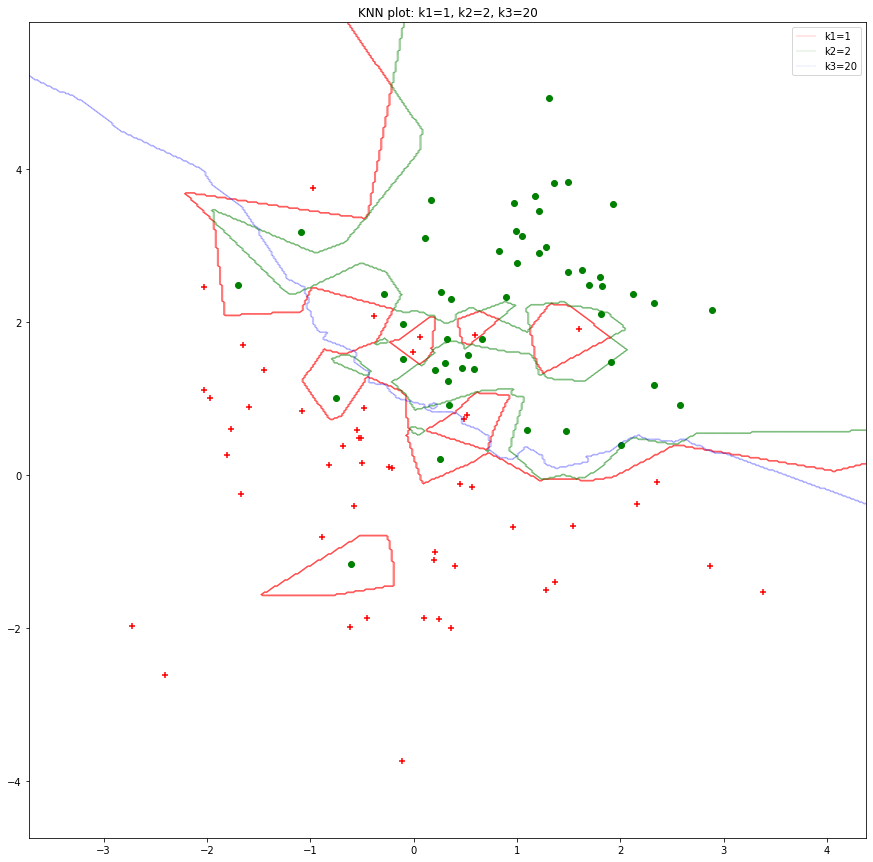

In [57]:
plot_decision_boundary(clf1, clf2, clf3, X, x1_samples, x2_samples, 1, 2, 20)